In [4]:
import tensorflow as tf

In [7]:
model = tf.keras.models.load_model('model_final_epoch5.h5')


# Extracting frames

In [4]:
import cv2
import os

In [10]:
vid=cv2.VideoCapture((r"E:\MINERVA_PROJECT_2\test_video_Trim.mp4"))
curr_frame=0

In [11]:
if not os.path.exists('all_data'):
    os.makedirs('all_data')

In [12]:
while(True):
    success,frame=vid.read()
    if not success: 
        break 
    cv2.imshow("output",frame)
    cv2.imwrite('./all_data2/frame'+str(curr_frame)+'.jpg',frame)
    curr_frame+=1
    
    if cv2.waitKey(1) & 0xFF ==ord("q"):
        break
        
vid.release()
cv2.destroyAllWindows()
    

# data preprocessing

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

In [7]:
SIZE = 128

batch_size = 32
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    'all_data/train/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
   'all_data/test/',
    target_size=(SIZE, SIZE),
    batch_size=batch_size,
    class_mode='input'
    )





Found 1848 images belonging to 1 classes.
Found 182 images belonging to 1 classes.


In [8]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))


#Decoder

model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 64)      

In [9]:
history = model.fit(
        train_generator,
        steps_per_epoch= 500 // batch_size,
        epochs=120,
        validation_data=validation_generator,
        validation_steps=75 // batch_size,
        shuffle = True)

Epoch 1/120
15/15 [==============================] - 121s 8s/step - loss: 0.0762 - mse: 0.0762 - val_loss: 0.0467 - val_mse: 0.0467
Epoch 2/120
15/15 [==============================] - 118s 8s/step - loss: 0.0284 - mse: 0.0284 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 3/120
15/15 [==============================] - 116s 8s/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 4/120
15/15 [==============================] - 85s 6s/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 5/120
15/15 [==============================] - 82s 5s/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 6/120
15/15 [==============================] - 84s 6s/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 7/120
15/15 [==============================] - 83s 6s/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 8/120
15/15 [==============================] - 83s 6s/step - loss: 0.0065 

15/15 [==============================] - 81s 5s/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 64/120
15/15 [==============================] - 80s 5s/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 65/120
15/15 [==============================] - 81s 5s/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 66/120
15/15 [==============================] - 79s 5s/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 67/120
15/15 [==============================] - 81s 5s/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 68/120
15/15 [==============================] - 80s 5s/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 69/120
15/15 [==============================] - 80s 5s/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 70/120
15/15 [==============================] - 81s 5s/step - loss: 0.0016 - mse: 0

# Saving the  model for further use

In [10]:
model.save('model_final_epoch_120.h5')

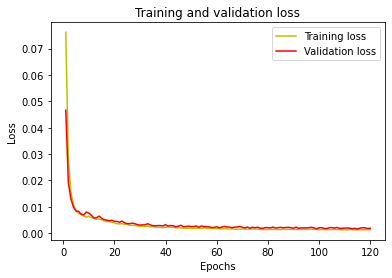

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])

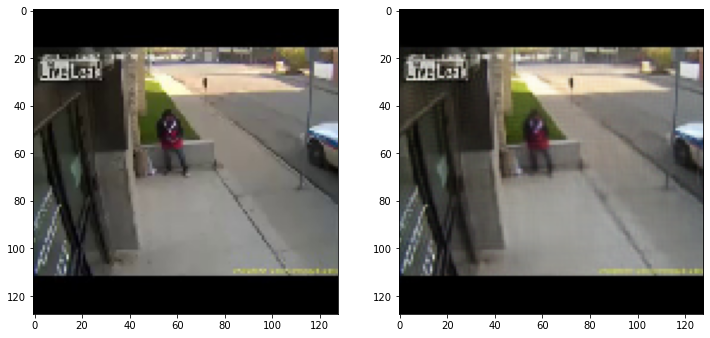

In [13]:
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

# Comparing only with RE value

In [22]:
def check_anomaly(img_path):
    
    reconstruction_error_threshold = 0.0052 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128)))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if reconstruction_error > reconstruction_error_threshold:
        val="The image is an anomaly"
        error=reconstruction_error
        
    else:
        val="The image is NOT an anomaly"
        error=reconstruction_error
    
    return val,error
        

In [35]:
img_path=r"E:\MINERVA_PROJECT_2\all_data\train\images\frame144.jpg"

1/1 [==============================] - 0s 100ms/step - loss: 0.0019 - mse: 0.0019


('The image is NOT an anomaly', 0.0019207014702260494)

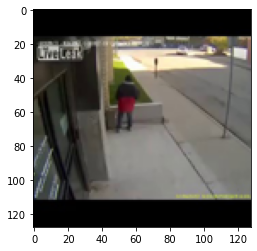

In [36]:
check_anomaly(img_path)

In [37]:
img_path_new=r"E:\MINERVA_PROJECT_2\Data\anomaly\images\img-2770.jpg"

1/1 [==============================] - 0s 105ms/step - loss: 0.0057 - mse: 0.0057


('The image is an anomaly', 0.0057229287922382355)

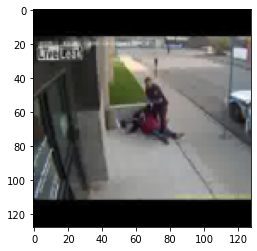

In [38]:
check_anomaly(img_path_new)

# Applying encoder with RE

In [39]:
encoder_model = Sequential()
encoder_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(128, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[6].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[8].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[10].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(8, (3, 3), activation='relu', padding='same', weights=model.layers[12].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 64)      

In [40]:
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict_generator(train_generator)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

C:\Users\Asus\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


In [41]:
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error

In [42]:
train_batch = train_generator.next()[0]


raw = calc_density_and_recon_error(train_batch)


1/1 [==============================] - 0s 99ms/step - loss: 0.0030 - mse: 0.0030


In [43]:
raw

(0.19969712698005068,
 0.5598227448872013,
 0.0017089939679980517,
 0.0013840825747755319)

In [69]:
def check_anomaly(img_path):
    density_threshold = -233 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.0050 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((128,128), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold and reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        print('RE',reconstruction_error)
        print('KDE',density)
        
    else:
        print("The image is NOT an anomaly")
        print('RE',reconstruction_error)
        print('KDE',density)

In [78]:
img_path_1=r"E:\MINERVA_PROJECT_2\Data\anomaly\images\img-2233.jpg"

1/1 [==============================] - 0s 98ms/step - loss: 0.0051 - mse: 0.0051
The image is an anomaly
RE 0.005120759829878807
KDE -279.8560646888016


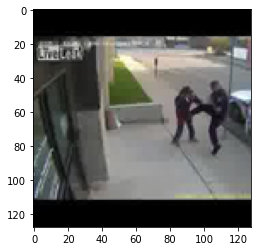

In [79]:
check_anomaly(img_path_1)

In [80]:
img_path_2=r"E:\MINERVA_PROJECT_2\all_data\train\images\frame0.jpg"

1/1 [==============================] - 0s 104ms/step - loss: 0.0052 - mse: 0.0052
The image is NOT an anomaly
RE 0.005192361772060394
KDE -232.12466952858992


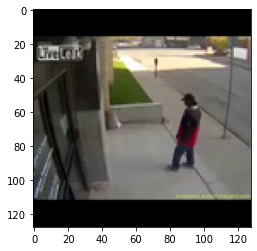

In [81]:
check_anomaly(img_path_2)

In [82]:
img_path_3=r"E:\MINERVA_PROJECT_2\all_data\train\images\frame124.jpg"

1/1 [==============================] - 0s 93ms/step - loss: 0.0020 - mse: 0.0020
The image is NOT an anomaly
RE 0.0019753901287913322
KDE -152.45015040831862


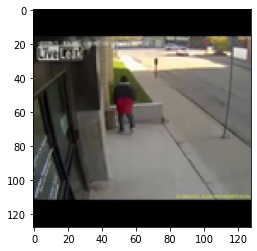

In [83]:
check_anomaly(img_path_3)

In [84]:
import cv2


In [114]:
capture_video=cv2.VideoCapture(r"E:\MINERVA_PROJECT_2\new_data\TESTING.mp4")
reconstruction_error_threshold = 0.0067
density_threshold = -2150
frame_count=0
frame_skip=18
fourcc=cv2.VideoWriter_fourcc(*'XVID')
out=cv2.VideoWriter('sample.mp4',fourcc,20.0, (600,400))
while True:
    ret,frame=capture_video.read()
    if not ret:
        
        break
   
    output=frame.copy()
    output=cv2.resize(output,(600,400))
   
    frame=cv2.resize(frame,(128,128))
    frame=frame/255
    frame =np.array(frame)
    
    #preds=model.predict(np.expand_dims(frame,axis=0))[0]
    
    frame = frame[np.newaxis, :,:,:]
    if frame_count%frame_skip==0:
        encoded_img = encoder_model.predict([[frame]]) 
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img]
        density = kde.score_samples(encoded_img)[0] 
        reconstruction = model.predict([[frame]])
        reconstruction_error = model.evaluate([reconstruction],[[frame]], batch_size = 1)[0]
        if density < density_threshold or reconstruction_error > reconstruction_error_threshold :

            val="Anomalous Event detected"
            print("reconstruction_error",reconstruction_error)
            print("density",density)

        else:
            val=""
            print("reconstruction_error",reconstruction_error)
            print("density",density)
    
   
    text=cv2.putText(output,val,(75,30),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
    frame_count+=1
    #resize = ResizeWithAspectRatio(image, width=500)
    out.write(text)
    cv2.imshow("video",text)
    if cv2.waitKey(1) & 0xFF ==ord("q"):
        break
        
capture_video.release()
out.release()
cv2.destroyAllWindows()
    

1/1 [==============================] - 0s 118ms/step - loss: 0.0063 - mse: 0.0063
reconstruction_error 0.006335648708045483
density -1265.5671681622505
1/1 [==============================] - 0s 122ms/step - loss: 0.0058 - mse: 0.0058
reconstruction_error 0.005823099985718727
density -872.755060378302
1/1 [==============================] - 0s 100ms/step - loss: 0.0059 - mse: 0.0059
reconstruction_error 0.005864302162081003
density -724.7107868926211
1/1 [==============================] - 0s 97ms/step - loss: 0.0059 - mse: 0.0059
reconstruction_error 0.005861119367182255
density -730.9223505133419
1/1 [==============================] - 0s 100ms/step - loss: 0.0059 - mse: 0.0059
reconstruction_error 0.005915917456150055
density -866.4447299190256
1/1 [==============================] - 0s 99ms/step - loss: 0.0058 - mse: 0.0058
reconstruction_error 0.005778574850410223
density -705.7858910319493
1/1 [==============================] - 0s 98ms/step - loss: 0.0058 - mse: 0.0058
reconstruction_

1/1 [==============================] - 0s 99ms/step - loss: 0.0041 - mse: 0.0041
reconstruction_error 0.004134086426347494
density -538.4576923853535
1/1 [==============================] - 0s 143ms/step - loss: 0.0040 - mse: 0.0040
reconstruction_error 0.0040128761902451515
density -34.45723435933048
1/1 [==============================] - 0s 99ms/step - loss: 0.0039 - mse: 0.0039
reconstruction_error 0.0039060809649527073
density -35.004402484320806
1/1 [==============================] - 0s 94ms/step - loss: 0.0038 - mse: 0.0038
reconstruction_error 0.0038176297675818205
density -37.45295796527741
1/1 [==============================] - 0s 117ms/step - loss: 0.0035 - mse: 0.0035
reconstruction_error 0.0035090476740151644
density -497.5681776610288
1/1 [==============================] - 0s 97ms/step - loss: 0.0031 - mse: 0.0031
reconstruction_error 0.0031188230495899916
density -47.35500986361409
1/1 [==============================] - 0s 98ms/step - loss: 0.0030 - mse: 0.0030
reconstruct

1/1 [==============================] - 0s 98ms/step - loss: 0.0064 - mse: 0.0064
reconstruction_error 0.0064150444231927395
density -2090.991457909646
1/1 [==============================] - 0s 108ms/step - loss: 0.0071 - mse: 0.0071
reconstruction_error 0.007075503468513489
density -1582.7085694372126
1/1 [==============================] - 0s 98ms/step - loss: 0.0069 - mse: 0.0069
reconstruction_error 0.006875859573483467
density -1076.0069266764974
1/1 [==============================] - 0s 127ms/step - loss: 0.0075 - mse: 0.0075
reconstruction_error 0.007527203299105167
density -354.25946840938303
1/1 [==============================] - 0s 107ms/step - loss: 0.0070 - mse: 0.0070
reconstruction_error 0.007024651858955622
density -306.900327435693
1/1 [==============================] - 0s 102ms/step - loss: 0.0075 - mse: 0.0075
reconstruction_error 0.007467117626219988
density -60.43818448927177
1/1 [==============================] - 0s 96ms/step - loss: 0.0076 - mse: 0.0076
reconstructi